# Module 4 R Exercises 

The exercises in the following notebook requires plotting histograms, line graphs and heat maps. Histograms and line grapgs are useful to understand the trends in data but heat maps offer more insights when looking for patterns. 

The motor vehicles theft data used in the notebook are incidents reported in Chicago city. It has 3 variables Date(incident reported date with time), Latitude and Longitude(coordinates where incident occured).

Read the data from tips text file in "../../../datasets/mvt.csv" into the dataframe called tips_data

In [34]:
mvt_data=read.csv("../../../datasets/mvt.csv")
str(mvt_data)

'data.frame':	191641 obs. of  3 variables:
 $ Date     : Factor w/ 131680 levels "1/1/01 0:01",..: 42824 42823 42823 42823 42822 42821 42820 42819 42817 42816 ...
 $ Latitude : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude: num  -87.6 -87.7 -87.8 -87.7 -87.6 ...


The variable Date is a factor in original dataset. 

**Activity 1: ** Convert it to POSIX form to extract date and time from it. Use strptime function for conversion. Create a variable "Day" to save the weekdays and variable "Hour" to save the hours. 

In [35]:
# Your code for activity 1 goes here..

# The format specified should match the input date format to extract respective information.
mvt_data$Date=strptime(mvt_data$Date,format="%m/%d/%y %H:%M")

# To find out the day of week, use weekdays()
mvt_data$Day = weekdays(mvt_data$Date)

# mvt_data$Date$hour will extract the hour from Date
mvt_data$Hour = mvt_data$Date$hour
str(mvt_data)

'data.frame':	191641 obs. of  5 variables:
 $ Date     : POSIXlt, format: "2012-12-31 23:15:00" "2012-12-31 22:00:00" ...
 $ Latitude : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude: num  -87.6 -87.7 -87.8 -87.7 -87.6 ...
 $ Day      : chr  "Monday" "Monday" "Monday" "Monday" ...
 $ Hour     : int  23 22 22 22 21 20 20 20 19 18 ...


**Reference: **

- [POSIXit](http://www.cyclismo.org/tutorial/R/time.html)
- [strptime](http://rfunction.com/archives/1912)

In [9]:
# The distribution of vehicle thefts by day of the week. 

table(mvt_data$Day)


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
    29284     27397     27118     26316     27319     26791     27416 

A histogram of Day variable will not be in the order of weekdays instead it will be in alphabetical order. Save the **Day** variable as a ordered factor after which ggplot() will know, variable **Day** is an ordered factor and will plot the 
days in listed order instead of plotting alphabetically.

**Activity 2: ** Convert "Day" in "mvt_data" into a factor with ordered values. Assign the levels as c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday").

In [36]:
# Your code for activity 2 goes here..

mvt_data$Day = factor(mvt_data$Day,ordered=TRUE,levels=c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"))

**Activity 3: ** Plot a histogram for distribution of thefts over days of the week.

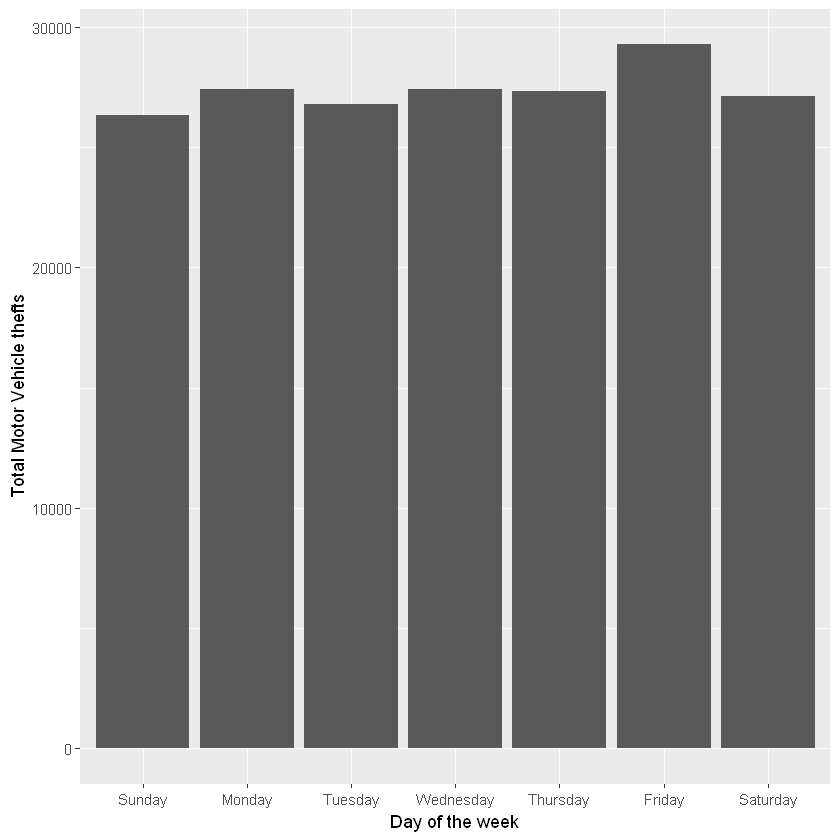

In [37]:
# Your code for activity 3 goes here..

library(ggplot2)

ggplot(mvt_data,aes(x=Day))+geom_bar()+xlab("Day of the week") + ylab("Total Motor Vehicle thefts")

In [38]:
# Distribution of vehicle thefts by day of the week and hour. Store this as a dataframe to plot a line graph and heat map later.
 
table(mvt_data$Day,mvt_data$Hour)

           
               0    1    2    3    4    5    6    7    8    9   10   11   12
  Sunday    2028 1236 1019  838  607  461  478  483  615  864  884  787 1192
  Monday    1900  825  712  527  415  542  772 1123 1323 1235  971  737 1129
  Tuesday   1691  777  603  464  414  520  845 1118 1175 1174  948  786 1108
  Wednesday 1814  790  619  469  396  561  862 1140 1329 1237  947  763 1225
  Thursday  1856  816  696  508  400  534  799 1135 1298 1301  932  731 1093
  Friday    1873  932  743  560  473  602  839 1203 1268 1286  938  822 1207
  Saturday  2050 1267  985  836  652  508  541  650  858 1039  946  789 1204
           
              13   14   15   16   17   18   19   20   21   22   23
  Sunday     789  959 1037 1083 1160 1389 1342 1706 1696 2079 1584
  Monday     824  958 1059 1136 1252 1518 1503 1622 1815 2009 1490
  Tuesday    762  908 1071 1090 1274 1553 1496 1696 1816 2044 1458
  Wednesday  804  863 1075 1076 1289 1580 1507 1718 1748 2093 1511
  Thursday   752  831 104

In [42]:
# Convert the list output from table() into a dataframe.
DayHourCounts = as.data.frame(table(mvt_data$Day,mvt_data$Hour))

# There are 168 observations one for each hour of the day and day of the week. 24*7=168. First variable gives day of the week. 
# Second variable gives hour of the day. THird variable "Freq" gives the total crime count for a particular hour.
str(DayHourCounts)

'data.frame':	168 obs. of  3 variables:
 $ Var1: Factor w/ 7 levels "Sunday","Monday",..: 1 2 3 4 5 6 7 1 2 3 ...
 $ Var2: Factor w/ 24 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ Freq: int  2028 1900 1691 1814 1856 1873 2050 1236 825 777 ...


**Reference: **

- [as.data.frame](https://www.r-bloggers.com/converting-a-list-to-a-data-frame/)

In [44]:
# Convert var2 in DayHourCounts into numbers. Create a new variable called Hour and assign numeric form of var2 to it. 
DayHourCounts$Hour = as.numeric(as.character(DayHourCounts$Var2))
str(DayHourCounts)

'data.frame':	168 obs. of  4 variables:
 $ Var1: Factor w/ 7 levels "Sunday","Monday",..: 1 2 3 4 5 6 7 1 2 3 ...
 $ Var2: Factor w/ 24 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ Freq: int  2028 1900 1691 1814 1856 1873 2050 1236 825 777 ...
 $ Hour: num  0 0 0 0 0 0 0 1 1 1 ...


**Activity 4: ** Plot a line graph with **Hour** and **Freq** from **DayHourCounts** on x axis and on y-axis respectively. Draw a line for each day differentiating each line with a different color. 

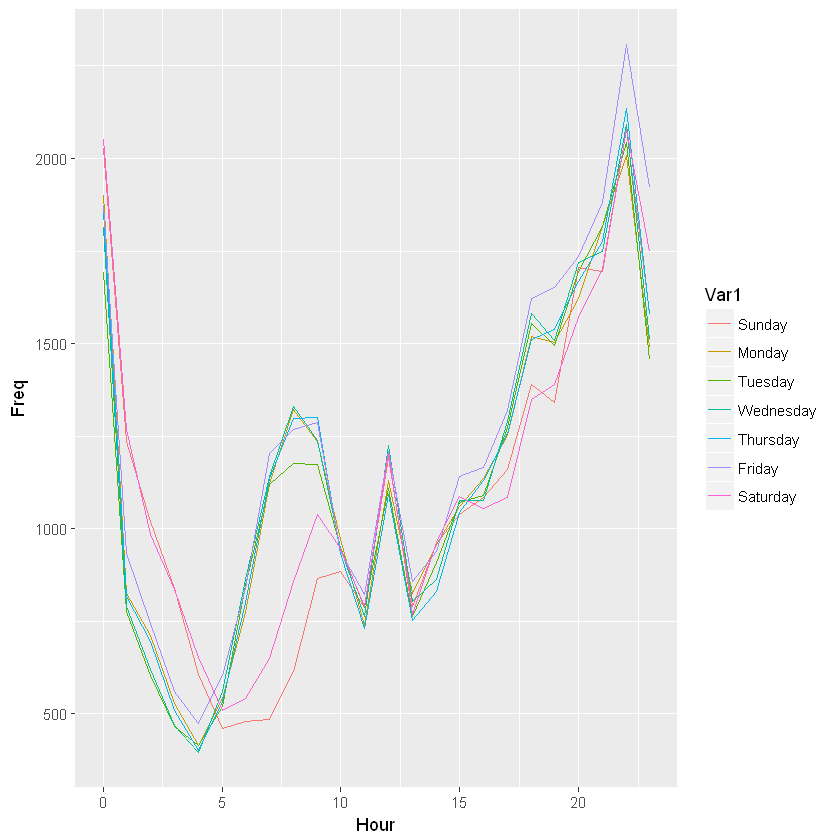

In [54]:
# Your code for activity 4 goes here..

ggplot(DayHourCounts,aes(x=Hour,y=Freq))+geom_line(aes(group=Var1,color=Var1))

What is your opinion on plot?

Here...

Plot a heat map instead of line graph. Again keep the the days in the order of weekdays just like how it is done above.

In [55]:
DayHourCounts$Var1 = factor(DayHourCounts$Var1,ordered=TRUE,levels=c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"))

**Activity 5: ** Plot a heat map with **Hour** and **Day** from **DayHourCounts** on x axis and on y-axis respectively. Use White for the low color and red as high color to fill the tiles. 

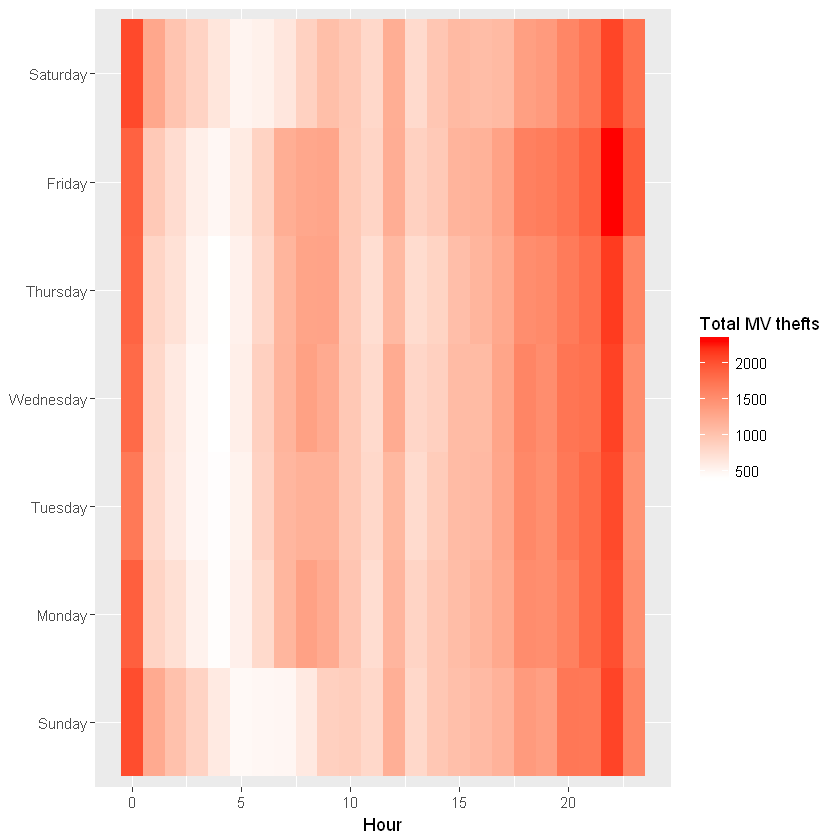

In [60]:
# Your code for activity 5 goes here..

ggplot(DayHourCounts,aes(x=Hour,y=Var1))+geom_tile(aes(fill=Freq)) + 
    scale_fill_gradient(name="Total MV thefts",low="white",high="red") +
    theme(axis.title.y=element_blank())

# The fill parameter corresponds to the color of rectangles for the total crime for a particular hour. 

For each hour and each day there is a rectangle. The color intensity of rectangle tells the frequency or the number of crimes happened in that hour on that day. According to the legend, lighter color corresponds to more crimes. So from the plot it is evident that more crimes occur at midnight during weekends. Also friday nights are when many thefts happen. Color schemes should be changed according to the problem. Different color schemes are helpful in different situations.